In [43]:
# Imports
import torch
# import jovian
import torchvision
import string
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
import numpy as np
from torch.utils.data import random_split
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import os
import cv2
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
df = pd.read_excel("numerical_chestxray_values.xlsx")

In [ ]:
#Mean Absolute Error closer to 0 the better
#Mean Squared Error closer to 0 the better
#R-squared closer to 1 the better

In [73]:
#Splitting Dataset
x = df.drop(columns = "Label")
y = df["Label"]
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [74]:
#Training Model
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [75]:
#Finding the intercept and coefficients
intercept = lr.intercept_
c = lr.coef_
print(intercept,c)

2.634912372411036 [-0.00965513  0.0085798  -0.55771513 -0.07724907 -0.00090466 -0.85969447
 -0.03381482]


In [76]:
#Predicting using training dataset
y_pred_train = lr.predict(X_train)

threshold = 0.5
y_pred_train = np.where(y_pred_train > threshold, 1, 0)

# plt.scatter(y_train,y_pred_train)
# plt.xlabel("Actual")
# plt.ylabel("Prediction")

In [77]:
#Metrics for training set
print("Mean Absolute Error for training set is:",mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error for training set is:",mean_squared_error(y_train, y_pred_train))
print("R-Squared score for training set is:",r2_score(y_train,y_pred_train))

Mean Absolute Error for training set is: 0.22224932910465967
Mean Squared Error for training set is: 0.22224932910465967
R-Squared score for training set is: -0.12550492948619363


In [78]:
#Using the test data
y_pred_test = lr.predict(X_test)

threshold = 0.5
y_pred_test = np.where(y_pred_test > threshold, 1, 0)

# plt.scatter(y_test,y_pred_test)
# plt.xlabel("Actual")
# plt.ylabel("Prediction")

In [79]:
#Metrics for testing set
print("Mean Absolute Error for test set is:",mean_absolute_error(y_test, y_pred_test))
print("Mean Squared Error for test set is:",mean_squared_error(y_test, y_pred_test))
print("R-Squared score for test set is:",r2_score(y_test, y_pred_test))

Mean Absolute Error for test set is: 0.21798520204894706
Mean Squared Error for test set is: 0.21798520204894706
R-Squared score for test set is: -0.10801176292373871


In [80]:
#Classification Report and Confusion Matrix for normal mlr
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

cr = classification_report(y_test, y_pred_test)
cm = confusion_matrix(y_test,y_pred_test)

print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.63      0.46      0.53       473
           1       0.82      0.90      0.86      1284

    accuracy                           0.78      1757
   macro avg       0.72      0.68      0.70      1757
weighted avg       0.77      0.78      0.77      1757

[[ 218  255]
 [ 128 1156]]


In [81]:
#Classification Report and Confusion Matrix for Lasso
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [82]:
#Finding the intercept and coefficients
intercept_lasso = lasso.intercept_
c_lasso = lasso.coef_
print(intercept_lasso,c_lasso)

1.1002329630595842 [-0.00013969  0.00238746 -0.          0.         -0.00108822  0.
 -0.01626564]


In [83]:
#Predicting using training dataset
y_pred_train_lasso = lasso.predict(X_train)
y_pred_train_lasso = np.where(y_pred_train_lasso > threshold, 1, 0)

In [84]:
#Metrics for Lasso Training set
print("Mean Absolute Error for Lasso training set is:",mean_absolute_error(y_train, y_pred_train_lasso))
print("Mean Squared Error for Lasso training set is:",mean_squared_error(y_train, y_pred_train_lasso))
print("R-Squared score for Lasso training set is:",r2_score(y_train, y_pred_train_lasso))

Mean Absolute Error for Lasso training set is: 0.2583556965113442
Mean Squared Error for Lasso training set is: 0.2583556965113442
R-Squared score for Lasso training set is: -0.30835315074190905


In [85]:
#Predicting using testing dataset
y_pred_test_lasso = lasso.predict(X_test)
y_pred_test_lasso = np.where(y_pred_test_lasso > threshold, 1, 0)

In [86]:
#Metrics for Lasso testing set
print("Mean Absolute Error for Lasso test set is:",mean_absolute_error(y_test, y_pred_test_lasso))
print("Mean Squared Error for Lasso test set is:",mean_squared_error(y_test, y_pred_test_lasso))
print("R-Squared score for Lasso test set is:",r2_score(y_test, y_pred_test_lasso))

Mean Absolute Error for Lasso test set is: 0.26920887877063177
Mean Squared Error for Lasso test set is: 0.26920887877063177
R-Squared score for Lasso test set is: -0.36838006230529596


In [87]:
cr_lasso = classification_report(y_test, y_pred_test_lasso)
cm_lasso = confusion_matrix(y_test,y_pred_test_lasso)
print(cr)
print(cm)

              precision    recall  f1-score   support

           0       0.63      0.46      0.53       473
           1       0.82      0.90      0.86      1284

    accuracy                           0.78      1757
   macro avg       0.72      0.68      0.70      1757
weighted avg       0.77      0.78      0.77      1757

[[ 218  255]
 [ 128 1156]]


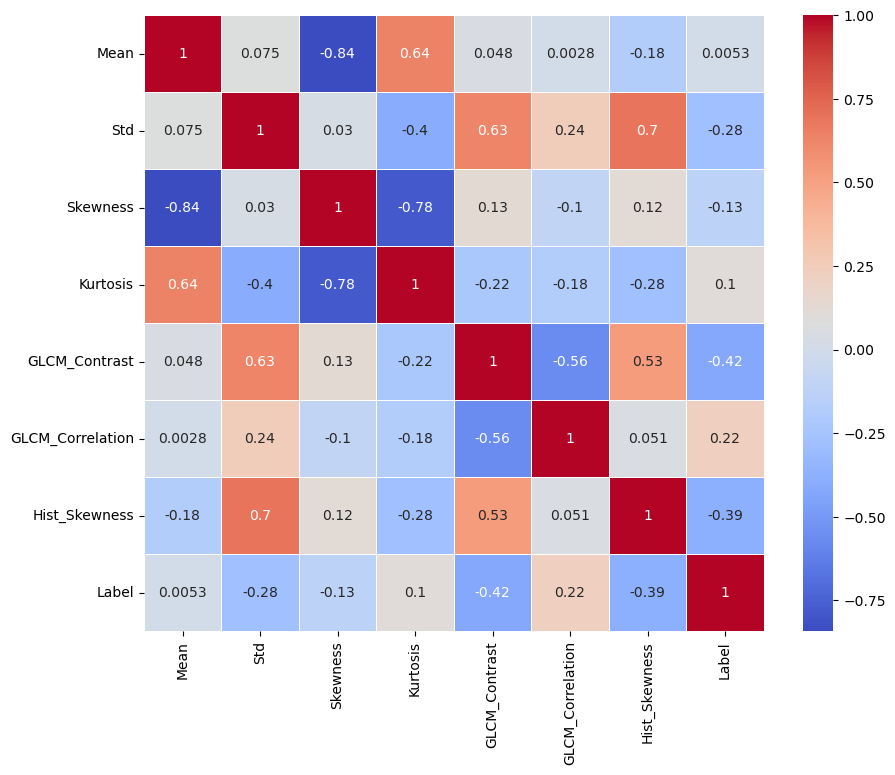

In [88]:
import seaborn as sns
# Create correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [72]:
#Ridge is not applicable as there is no high colinearity between predictors